In [2]:
import xarray as xr
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt


# visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean

In [3]:
# Open the binned stats to select region

ds_stats = xr.open_dataset('binned_stats.nc')

In [4]:
def postobox(lon, lat):
    y_box = [lat[0], lat[0], lat[1], lat[1], lat[0]]
    x_box = [lon[0], lon[1], lon[1], lon[0], lon[0]]
    
    return x_box, y_box

In [5]:
# Define box boundaries
np_param=[-155,-145,30,35,0,2000]
na_param=[-55,-45,40,45,0,2000]
so_param=[30,40,-55,-50,0,2000]
io_param=[90,100,-15,-10,0,2000]
s_param = [25,45,-60,-50]

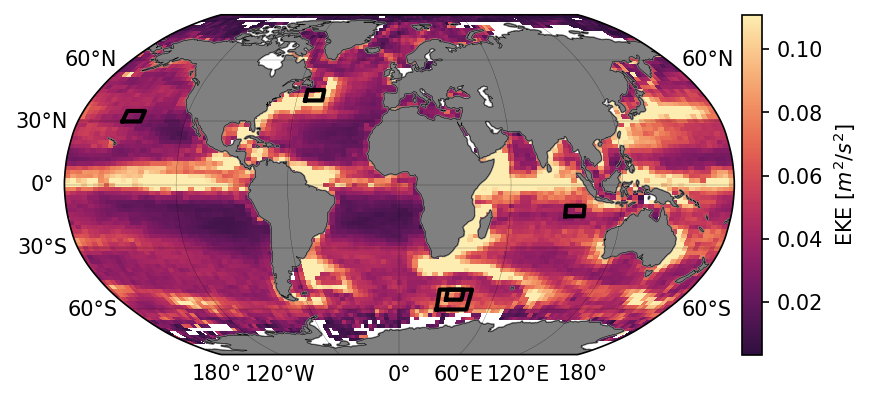

In [6]:
x_c = ds_stats.lon
y_c = ds_stats.lat
# get 1st and 99th percentiles of values to plot to get a useful range for the colorscale
EKE= ds_stats.EKE
v1,v2 = np.nanpercentile(EKE.T,[1,99])

fig = plt.figure(dpi=150)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=0))
#cmap = cmocean.tools.crop(cmocean.cm.matter_r, vmin=0, vmax=v2, pivot=0)
cmap = cmocean.cm.matter_r
pcm = ax.pcolormesh(x_c, y_c, 
                    EKE, 
                    cmap=cmap, 
                    transform=ccrs.PlateCarree(),
                    vmin=v1, vmax=v2/2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#plt.plot(postobox(lon, lat), color='red')
ax.plot(postobox(np_param[:2],np_param[2:])[0],postobox(np_param[:2], np_param[2:])[1], color='black',transform=ccrs.PlateCarree(),lw=2)
ax.plot(postobox(na_param[:2],na_param[2:])[0],postobox(na_param[:2], na_param[2:])[1], color='black',transform=ccrs.PlateCarree(),lw=2)
ax.plot(postobox(so_param[:2],so_param[2:])[0],postobox(so_param[:2], so_param[2:])[1], color='black',transform=ccrs.PlateCarree(),lw=2)
ax.plot(postobox(io_param[:2],io_param[2:])[0],postobox(io_param[:2], io_param[2:])[1], color='black',transform=ccrs.PlateCarree(),lw=2)
ax.plot(postobox(s_param[:2],s_param[2:])[0],postobox(s_param[:2], s_param[2:])[1], color='black',transform=ccrs.PlateCarree(),lw=2)

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax);
cb.ax.set_ylabel(r'EKE [$m^2/s^2$]');

plt.savefig('EKE_map.pdf')